# Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Set styles for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# EDA

In [2]:
# Read the files
df_results = pd.read_csv('results.csv')
df_status = pd.read_csv('status.csv')
df_races = pd.read_csv('races.csv')

In [3]:
df_races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [4]:
races = df_races[["raceId", "year", "round", "name"]]
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   raceId  1125 non-null   int64 
 1   year    1125 non-null   int64 
 2   round   1125 non-null   int64 
 3   name    1125 non-null   object
dtypes: int64(3), object(1)
memory usage: 35.3+ KB


In [5]:
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [6]:
df_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [7]:
# merge the datasets
df = df_results.merge(df_races, on='raceId').merge(df_status, on='statusId')
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,status
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,Finished


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number           26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time_x           26759 non-null  object 
 12  milliseconds     26759 non-null  object 
 13  fastestLap       26759 non-null  object 
 14  rank             26759 non-null  object 
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 17  statusId    

In [9]:
df.isna().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time_x             0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
year               0
round              0
circuitId          0
name               0
date               0
time_y             0
url                0
fp1_date           0
fp1_time           0
fp2_date           0
fp2_time           0
fp3_date           0
fp3_time           0
quali_date         0
quali_time         0
sprint_date        0
sprint_time        0
status             0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# check unique values for the objects data type
objs = df.select_dtypes(include='object')
for obj in objs:
    print(df[obj].value_counts())
    print('='*50)

number
4      1019
16     1005
11     1001
3       994
6       994
       ... 
120       1
126       1
110       1
130       1
107       1
Name: count, Length: 130, dtype: int64
position
\N    10953
3      1135
4      1135
2      1133
5      1131
1      1128
6      1124
7      1104
8      1076
9      1038
10      978
11      901
12      800
13      713
14      605
15      528
16      432
17      336
18      223
19      141
20       72
21       34
22       19
23        8
24        3
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
Name: count, dtype: int64
positionText
R     8897
F     1368
3     1135
4     1135
2     1133
5     1131
1     1128
6     1124
7     1104
8     1076
9     1038
10     978
11     902
12     800
13     713
14     606
15     528
16     432
W      336
17     336
18     223
N      190
D      151
19     141
20      72
21      34
22      19
E        9
23       8
24       3
29       1
32       1
31       1
30 

In [12]:
# Replace '\\N' with NaN
df.replace('\\N', np.nan, inplace=True)

In [13]:
# Feature Engineering
df['positions_lost'] = df['grid'] - df['positionOrder']
df.loc[df['grid'] == 0, 'positions_lost'] = np.nan

# DNF flag
df['dnf_flag'] = ~df['positionText'].str.isnumeric()

# Race finish rate (1 if finished, 0 if not)
df['finish_rate'] = df['dnf_flag'].apply(lambda x: 0 if x else 1)

# Decade for era analysis
df['decade'] = (df['year'] // 10) * 10

In [14]:
print("Driver Performance Stats:")
df[['points', 'grid', 'positionOrder', 'positions_lost','finish_rate',]].describe()

Driver Performance Stats:


,points,grid,positionOrder,positions_lost,finish_rate
count,26759.000000,26759.000000,26759.000000,25121.000000,26759.000000
mean,1.987632,11.134796,12.794051,0.002189,0.590755
std,4.351209,7.202860,7.665951,7.185223,0.491704
min,0.000000,0.000000,1.000000,-31.000000,0.000000
25%,0.000000,5.000000,6.000000,-4.000000,0.000000
50%,0.000000,11.000000,12.000000,1.000000,1.000000
75%,2.000000,17.000000,18.000000,4.000000,1.000000
max,50.000000,34.000000,39.000000,30.000000,1.000000


In [15]:
print("DNFs per year:")
df.groupby('year')['dnf_flag'].sum().describe()

DNFs per year:


count     75.000000
mean     146.013333
std       79.203551
min       48.000000
25%       87.000000
50%      120.000000
75%      207.500000
max      427.000000
Name: dnf_flag, dtype: float64

In [16]:
# Select numeric columns of interest
num_cols = ['positions_lost', 'grid', 'positionOrder', 'points', 'laps']
df_z = df[num_cols].copy()

# Fill NaNs temporarily
df_z = df_z.fillna(0)

# Compute Z-scores
z_scores = np.abs(zscore(df_z))

# Threshold for outliers
threshold = 3
outliers = (z_scores > threshold)

# Count outliers per column
outlier_counts = pd.DataFrame(outliers, columns=num_cols).sum().sort_values(ascending=False)

print("Outlier counts per variable:")
print(outlier_counts)

Outlier counts per variable:
points            624
laps              245
positions_lost    151
positionOrder      65
grid               14
dtype: int64


In [17]:
df = df[(z_scores < threshold).all(axis=1)]

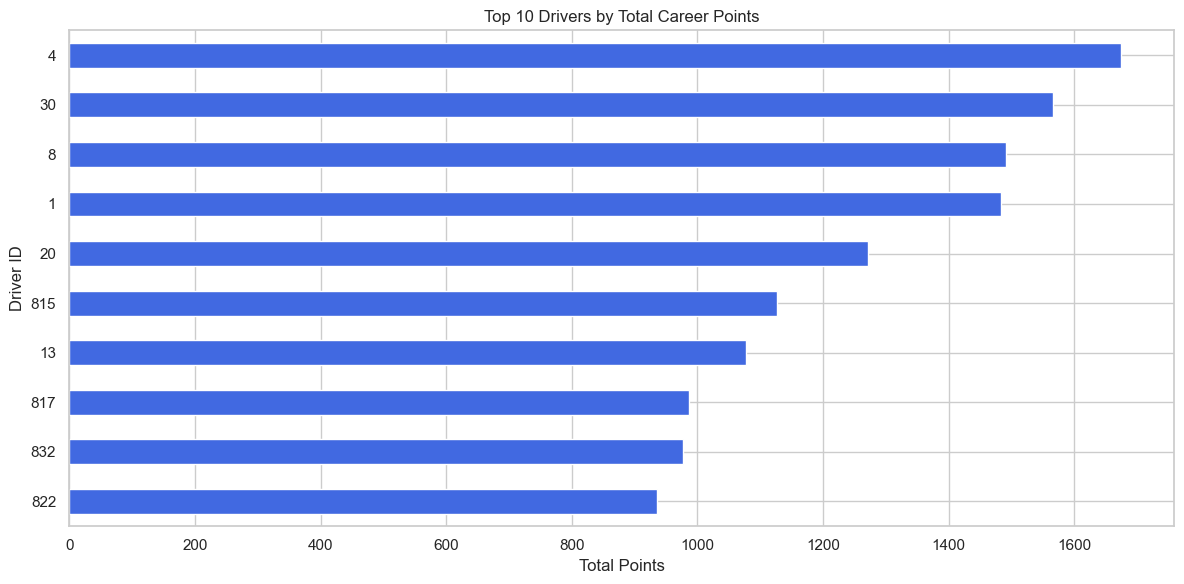

In [18]:
# Top 10 performers
top_drivers = df.groupby('driverId')['points'].sum().sort_values(ascending=False).head(10)
top_drivers.plot(kind='barh', color='royalblue')
plt.title("Top 10 Drivers by Total Career Points")
plt.xlabel("Total Points")
plt.ylabel("Driver ID")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

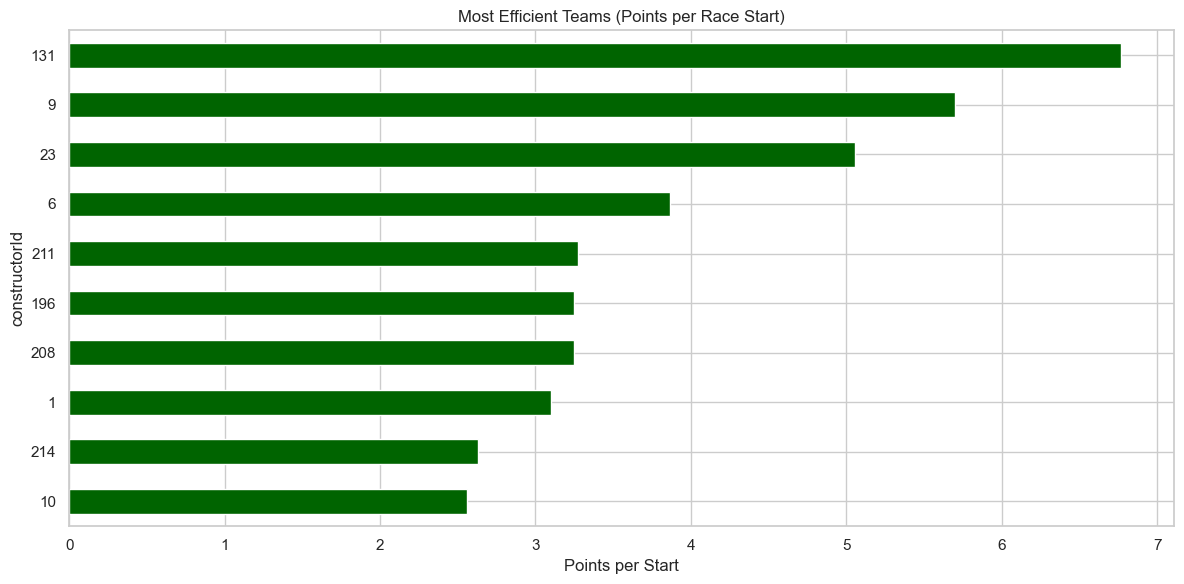

In [19]:
# Team efficiency
team_eff = df[df['grid'] > 0].groupby('constructorId').agg({
    'points': 'sum',
    'raceId': 'count'
})
team_eff['points_per_start'] = team_eff['points'] / team_eff['raceId']
top_teams = team_eff.sort_values('points_per_start', ascending=False).head(10)

top_teams['points_per_start'].plot(kind='barh', color='darkgreen')
plt.title("Most Efficient Teams (Points per Race Start)")
plt.xlabel("Points per Start")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

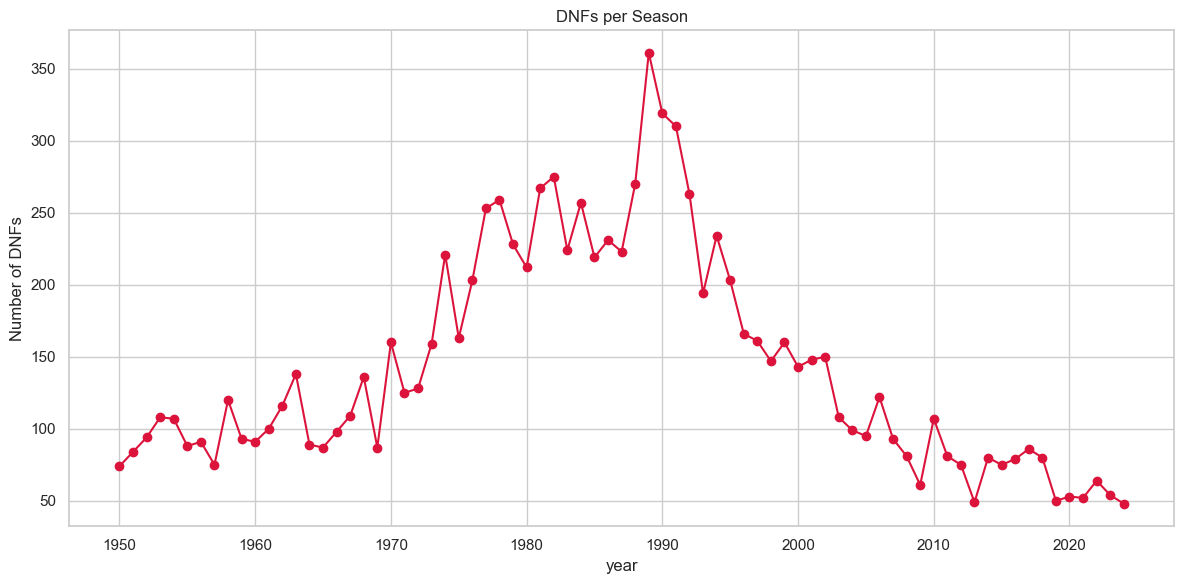

In [20]:
# Reliability analysis (DNFs)
dnfs_by_year = df[df['dnf_flag']].groupby('year')['dnf_flag'].sum()
dnfs_by_year.plot(marker='o', color='crimson')
plt.title("DNFs per Season")
plt.ylabel("Number of DNFs")
plt.grid(True)
plt.tight_layout()
plt.show()

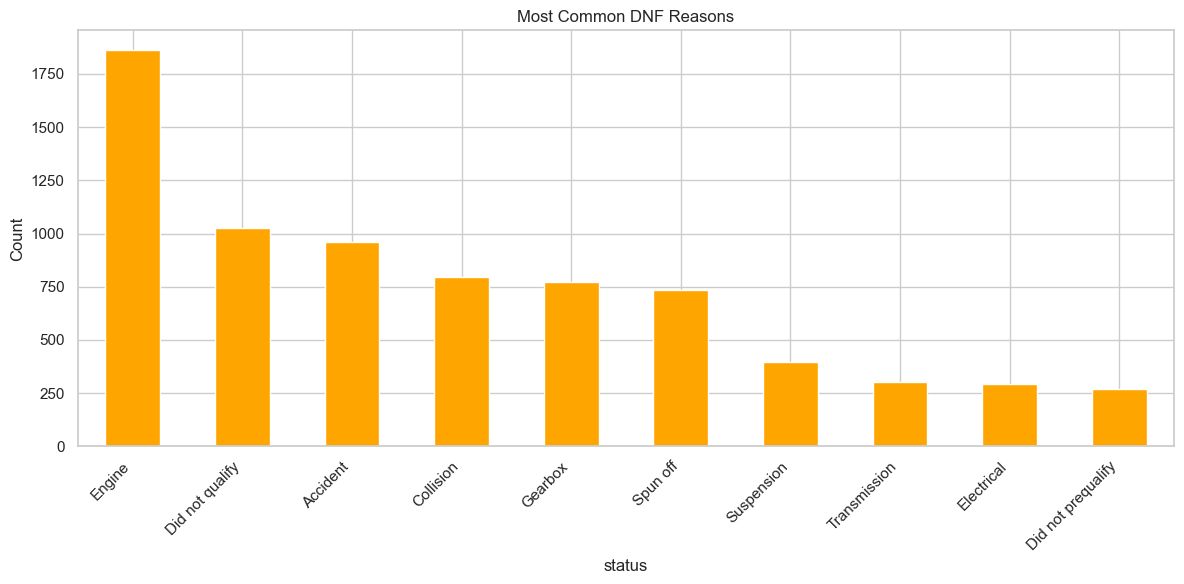

In [21]:
# Common DNF causes
common_status = df[df['dnf_flag']]['status'].value_counts().head(10)
common_status.plot(kind='bar', color='orange')
plt.title("Most Common DNF Reasons")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

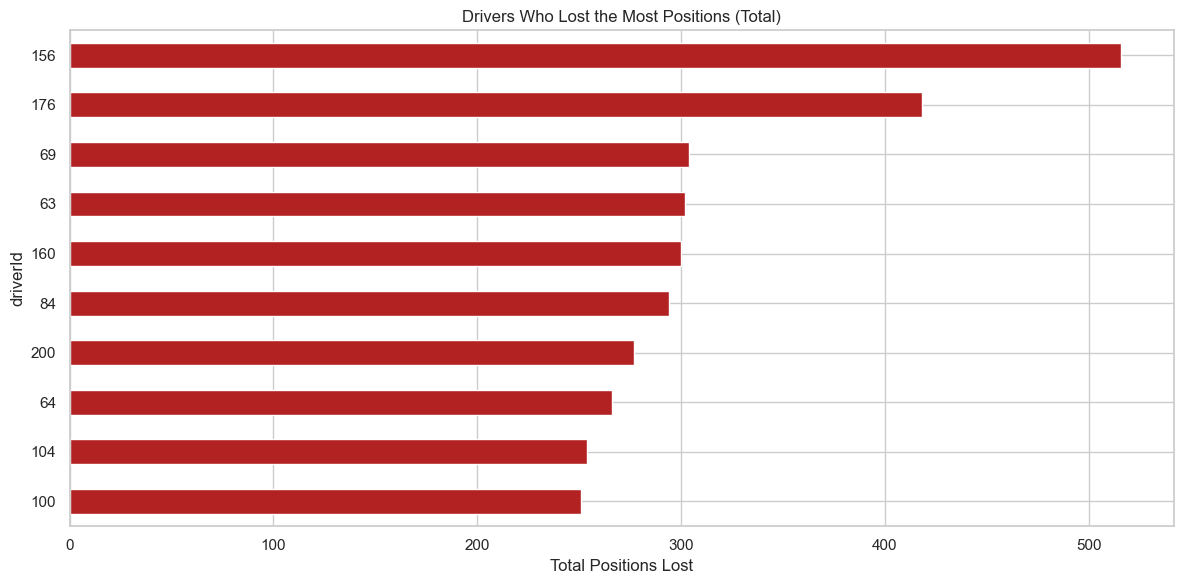

In [22]:
# Worst Performers (most positions lost)
loss_stats = df[df['positions_lost'].notna()].groupby('driverId')['positions_lost'].sum()
worst_losers = loss_stats.sort_values(ascending=False).head(10)
worst_losers.plot(kind='barh', color='firebrick')
plt.title("Drivers Who Lost the Most Positions (Total)")
plt.xlabel("Total Positions Lost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

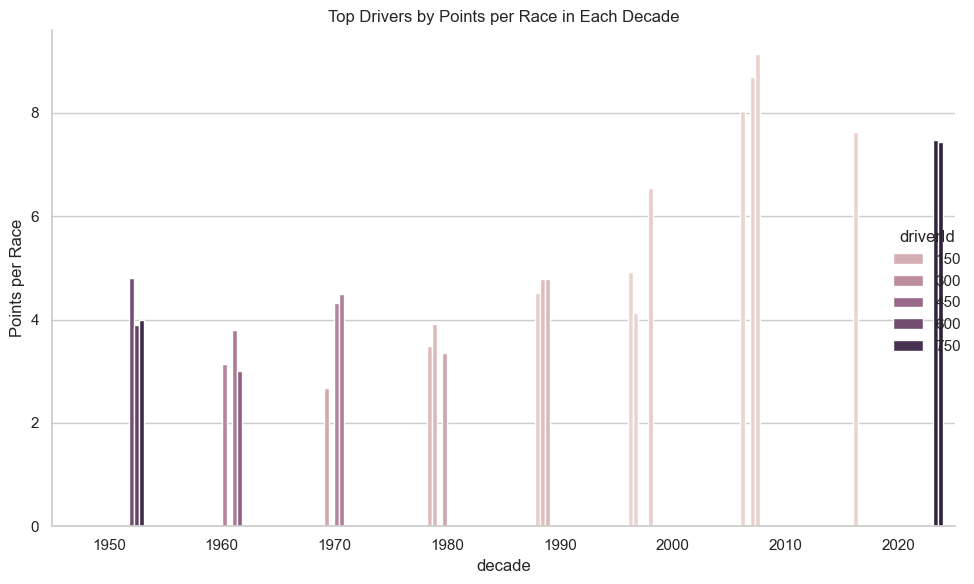

In [23]:
# Era comparison
era_stats = df.groupby(['decade', 'driverId']).agg({
    'points': 'sum',
    'raceId': 'count'
}).reset_index()
era_stats['points_per_race'] = era_stats['points'] / era_stats['raceId']

# Top 3 drivers per decade
top_by_decade = era_stats.sort_values(['decade', 'points_per_race'], ascending=[True, False])
top_by_decade = top_by_decade.groupby('decade').head(3)

sns.catplot(data=top_by_decade, kind='bar', x='decade', y='points_per_race', hue='driverId', height=6, aspect=1.5)
plt.title("Top Drivers by Points per Race in Each Decade")
plt.ylabel("Points per Race")
plt.tight_layout()
plt.show()

# **Reporting**
___

## **Findings**
- The most high period of DFNs from after 1970s till before 2000s
- Most common DNF causes were:

        - Engine
        - Not qualify
        - Accident
        - Collisions
        - Gear Box
- The decade from 2000 to 2010 have the most top drivers the the top points
___
## **Recommendations**
- Address common DNF causes like engine and gearbox failures with targeted engineering and testing
- Monitor drivers who regularly lose positions evaluate pressure handling, racecraft, and race strategy alignment.
-  For Data-Driven Strategy Use finish rate, DNF patterns, and position loss as early indicators of technical or strategic issues.